In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 32)

In [19]:
df = pd.read_csv('C:/workspace/PYTHON/PROJECT2/data/hotel_bookings_cancel.csv')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119390 non-null  int64  
 1   lead_time                       119390 non-null  int64  
 2   arrival_date_month              119390 non-null  object 
 3   arrival_date_day_of_month       119390 non-null  int64  
 4   stays_in_weekend_nights         119390 non-null  int64  
 5   stays_in_week_nights            119390 non-null  int64  
 6   adults                          119390 non-null  int64  
 7   children                        119386 non-null  float64
 8   babies                          119390 non-null  int64  
 9   meal                            119390 non-null  object 
 10  market_segment                  119390 non-null  object 
 11  is_repeated_guest               119390 non-null  int64  
 12  previous_cancell

In [20]:
filter = df['is_canceled'] == 1

long = df[filter]

counts = long.groupby(['reserved_room_type']).agg('count').reset_index()
counts = counts.iloc[:, :2]
counts = counts.rename(columns={'is_canceled':'Counts of Cancellation'})
counts

,reserved_room_type,Counts of Cancellation
0,A,33630
1,B,368
2,C,308
3,D,6102
4,E,1914
5,F,880
6,G,763
7,H,245
8,L,2
9,P,12


In [21]:
counts = counts.drop(['reserved_room_type'], axis = 1)

In [22]:
filter_no = df['is_canceled'] == 0

no = df[filter_no]

no = no.groupby(['reserved_room_type']).agg('count').reset_index()
no = no.iloc[:, :2]
no = no.rename(columns = {'is_canceled':"Counts of Reservation"})
no

,reserved_room_type,Counts of Reservation
0,A,52364
1,B,750
2,C,624
3,D,13099
4,E,4621
5,F,2017
6,G,1331
7,H,356
8,L,4


In [23]:
result = pd.concat([no,counts],axis=1)
result

,reserved_room_type,Counts of Reservation,Counts of Cancellation
0,A,52364.0,33630
1,B,750.0,368
2,C,624.0,308
3,D,13099.0,6102
4,E,4621.0,1914
5,F,2017.0,880
6,G,1331.0,763
7,H,356.0,245
8,L,4.0,2
9,NaN,NaN,12


In [26]:
result.dropna(inplace=True)

In [27]:
result

,reserved_room_type,Counts of Reservation,Counts of Cancellation
0,A,52364.0,33630
1,B,750.0,368
2,C,624.0,308
3,D,13099.0,6102
4,E,4621.0,1914
5,F,2017.0,880
6,G,1331.0,763
7,H,356.0,245
8,L,4.0,2


In [29]:
import plotly.express as px

fig = px.bar(result, x="reserved_room_type", y=["Counts of Reservation", "Counts of Cancellation"], 
             title="Room_Type", template = 'plotly_dark')
fig.show()

In [5]:
res = df.groupby(['reservation_status']).agg('count').reset_index()
res = res.iloc[:, :2]
res = res.rename(columns={'is_canceled':'Counts'})
res

,reservation_status,Counts
0,Canceled,43017
1,Check-Out,75166
2,No-Show,1207


In [6]:
px.pie(res, template = 'plotly_dark', values = 'Counts', names = 'reservation_status', title = 'Reservation Status', 
      color = 'reservation_status', color_discrete_map={'Check-Out':'darkblue',
                                 'Canceled':'royalblue',
                                 'No-Show':'cyan'})

# RF

In [36]:
df = pd.read_csv('C:/workspace/PYTHON/PROJECT2/data/hotel_bookings_cancel.csv')

In [8]:
df['agent'] = df['agent'].fillna(0)
df.loc[df.agent != 0,'agent']= 1

In [9]:
df['children'] = df['children'].fillna(0)

In [10]:
df["total_guest"] = df["adults"] + df["children"] + df["babies"]
df['kids'] = df['children'] + df['babies']
df = df.drop(['arrival_date_day_of_month', 'reserved_room_type', 'assigned_room_type',
              "adults", "children","babies", "assigned_room_type", 'required_car_parking_spaces', 
              'total_of_special_requests', "reservation_status"], axis =1)

In [26]:
df[:3]

,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,meal,market_segment,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,customer_type,adr,total_guest,kids
0,0,342,July,0,0,BB,Direct,0,0,0,3,No Deposit,0.0,Transient,0.0,2.0,0.0
1,0,737,July,0,0,BB,Direct,0,0,0,4,No Deposit,0.0,Transient,0.0,2.0,0.0
2,0,7,July,0,1,BB,Direct,0,0,0,0,No Deposit,0.0,Transient,75.0,1.0,0.0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119390 non-null  int64  
 1   lead_time                       119390 non-null  int64  
 2   arrival_date_month              119390 non-null  object 
 3   stays_in_weekend_nights         119390 non-null  int64  
 4   stays_in_week_nights            119390 non-null  int64  
 5   meal                            119390 non-null  object 
 6   market_segment                  119390 non-null  object 
 7   is_repeated_guest               119390 non-null  int64  
 8   previous_cancellations          119390 non-null  int64  
 9   previous_bookings_not_canceled  119390 non-null  int64  
 10  booking_changes                 119390 non-null  int64  
 11  deposit_type                    119390 non-null  object 
 12  agent           

In [11]:
df = pd.get_dummies(df)
df[:3]

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,adr,total_guest,kids,arrival_date_month_April,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,...,meal_Non-meal,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,0,0,0,0,0,3,0.0,0.0,2.0,0.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,0,737,0,0,0,0,0,4,0.0,0.0,2.0,0.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,0,7,0,1,0,0,0,0,0.0,75.0,1.0,0.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


### RF Parameter

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns

In [31]:
X = df.drop(['is_canceled'],axis=1)
y = df['is_canceled']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

C:\Users\CPB06GameN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



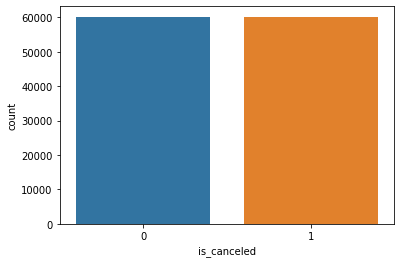

In [40]:
from imblearn.over_sampling import RandomOverSampler

over = RandomOverSampler()

X_train, y_train = over.fit_resample(X_train, y_train)
df_sample = pd.DataFrame(X_train, columns=X_train.columns)

sns.countplot(y_train);

In [16]:
scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

In [192]:
model = RandomForestClassifier(n_estimators = 100, max_depth = 10, random_state = 0).fit(X_train_s, y_train)
print(model.score(X_train_s, y_train))
print(model.score(X_test_s, y_test))

0.7616775740620473
0.7566379093726443


In [48]:
from sklearn.model_selection import GridSearchCV

In [24]:
params = { 'n_estimators' : [10, 100],
           'max_depth' : [4, 6, 8, 10, 12]
            }

model = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(model, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(X_train_scaled, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 12, 'n_estimators': 10}
최고 예측 정확도: 0.7825


In [49]:
model = RandomForestClassifier().fit(X_train_s, y_train)

print(model.feature_importances_)

[2.55086000e-01 3.78475294e-02 6.58261220e-02 3.11592120e-03
 3.68284326e-02 5.03132919e-03 2.70932081e-02 8.08132358e-03
 2.01369949e-01 2.47245563e-02 8.67643035e-03 6.45394685e-03
 6.83699995e-03 5.23820224e-03 5.43365088e-03 4.34692547e-03
 6.78255120e-03 6.38730391e-03 5.95478733e-03 6.79608592e-03
 4.47168257e-03 6.68526813e-03 6.03886055e-03 7.14130661e-03
 1.50867265e-03 6.83658152e-03 5.80785739e-03 3.50326649e-04
 4.42652691e-04 2.85047416e-03 1.03841694e-02 1.45947365e-02
 1.13789312e-02 2.19966569e-02 6.26659373e-05 7.33050098e-02
 7.00361009e-02 3.61849824e-04 2.20748436e-03 5.40218363e-04
 1.42574735e-02 1.08297655e-02]


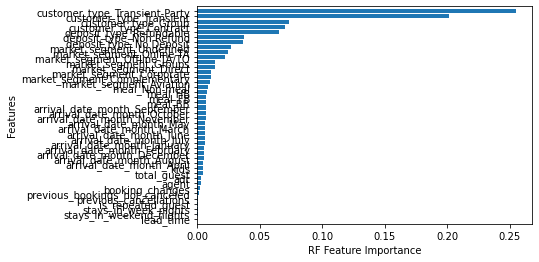

In [50]:
import matplotlib.pyplot as plt

def plot_feature_importances_hotel(model):
    n_features = X.shape[1]
    plt.barh(np.arange(n_features), sorted(model.feature_importances_), align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel('RF Feature Importance')
    plt.ylabel('Features')
    plt.ylim(-1, n_features)
    
plot_feature_importances_hotel(model)

### RF RFE

In [ ]:
from sklearn.feature_selection import RFE
model = RandomForestClassifier().fit(X_train_s, y_train)

rfe_rf = RFE(model, n_features_to_select = 10, step = 1)
model_rf = rfe_rf.fit(X_train_s, y_train)

print(model_rf.support_)

print(model_rf.score(X_test_s, y_test))

### LR RFE

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE


model = LogisticRegression().fit(X_train_s, y_train)

rfe_lr = RFE(model, n_features_to_select = 5, step = 1)
model_lr = rfe_lr.fit(X_train_s, y_train)

print(model_lr.support_)

print(model_lr.score(X_test_s, y_test))

[ True  True  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True False False False  True
 False]
0.7682804254962727


In [ ]:
1 : lead_time
2 : arrival_dateday_of_month
13 : adr
62 : deposit_type_No Deposit
63 : deposit_type_Non Refund

In [81]:
df.columns[63]

'deposit_type_Non Refund'

In [52]:
# !pip install catboost

In [52]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(iterations=100)
cat.fit(X_train_s, y_train)

Learning rate set to 0.5
0:	learn: 0.5044793	total: 214ms	remaining: 21.2s
1:	learn: 0.4840899	total: 236ms	remaining: 11.6s
2:	learn: 0.4731653	total: 258ms	remaining: 8.35s
3:	learn: 0.4693224	total: 277ms	remaining: 6.65s
4:	learn: 0.4657762	total: 295ms	remaining: 5.61s
5:	learn: 0.4633647	total: 314ms	remaining: 4.92s
6:	learn: 0.4612391	total: 332ms	remaining: 4.41s
7:	learn: 0.4592091	total: 351ms	remaining: 4.04s
8:	learn: 0.4566796	total: 371ms	remaining: 3.75s
9:	learn: 0.4550185	total: 390ms	remaining: 3.51s
10:	learn: 0.4534093	total: 412ms	remaining: 3.33s
11:	learn: 0.4525749	total: 431ms	remaining: 3.16s
12:	learn: 0.4519971	total: 449ms	remaining: 3s
13:	learn: 0.4502737	total: 469ms	remaining: 2.88s
14:	learn: 0.4491909	total: 489ms	remaining: 2.77s
15:	learn: 0.4482754	total: 508ms	remaining: 2.67s
16:	learn: 0.4469600	total: 527ms	remaining: 2.57s
17:	learn: 0.4458133	total: 546ms	remaining: 2.49s
18:	learn: 0.4445460	total: 566ms	remaining: 2.41s
19:	learn: 0.443201

In [53]:
print(cat.score(X_train_s, y_train))
print(cat.score(X_test_s, y_test))

0.798288121763168
0.7864561521065416


In [54]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(n_estimators = 300, learning_rate = 0.001, max_depth = 4).fit(X_train_s, y_train)

print(gbrt.score(X_train_s, y_train))
print(gbrt.score(X_test_s, y_test))

0.7397462157166409
0.7214590836753497


In [ ]:
params = { 'n_estimators' : [100, 1000, 2000],
          'learning_rate' : [0.01, 0.001],
           'max_depth' : [4, 6]
            }

model = GradientBoostingClassifier(random_state = 0)
grid_cv = GridSearchCV(model, param_grid = params, cv = 3)
grid_cv.fit(X_train_s, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

In [55]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier().fit(X_train_s, y_train)

print(dt.score(X_train_s, y_train))
print(dt.score(X_test_s, y_test))

0.9893756973239413
0.7888014071530279


In [56]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier().fit(X_train_s, y_train)

print(knn.score(X_train_s, y_train))
print(knn.score(X_test_s, y_test))

0.8625002081564004
0.7625429265432616


In [57]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier().fit(X_train_s, y_train)

print(bagging.score(X_train_s, y_train))
print(bagging.score(X_test_s, y_test))

0.9838970208655976
0.8171538654828713


In [58]:
from sklearn.ensemble import ExtraTreesClassifier

xtree = ExtraTreesClassifier().fit(X_train_s, y_train)

print(xtree.score(X_train_s, y_train))
print(xtree.score(X_test_s, y_test))

0.9893756973239413
0.8167769494932574


In [59]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier().fit(X_train_s, y_train)

print(ada.score(X_train_s, y_train))
print(ada.score(X_test_s, y_test))

0.7487468984696342
0.7504397353212162
